# E02 Time series - solutions

1. Download the numpy binary file `time-seriesE4.npy` located in the `excercises` folder of the [github repository](https://github.com/mgraupe/DataSciPy/tree/master/excercises) or the moodle. Load the file using the numpy `load` function and save the imported data in variable named `data4` (note that the `time-series4.npy` file needs to be located in the same folder as the jupyter-notebook).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data4 = np.load('time-seriesE4.npy')


2. In the loaded array, the first row contains the time-points (in seconds) at which the transmembrane potential (in volts, in the 2nd row) were recorded. Plot the data in a meaningful way.  

Text(0, 0.5, 'transmembrane voltage (mV)')

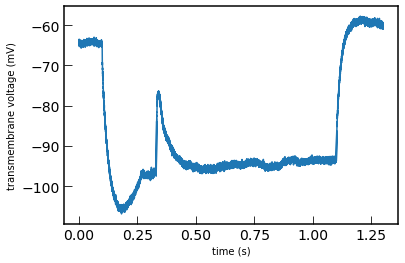

In [16]:
# note that the code below to generate a figure is not part of the assignment 
plt.plot(data4[0],data4[1]*1000.)
plt.xlabel('time (s)')
plt.ylabel('transmembrane voltage (mV)')

3. What is the time interval between each individual potential recording ? Is the interval the same throughout the recording, i.e., across all time points?  Compute the sampling frequency (or acquisition rate) of the data. 

first 100 and last 100 elements :  [4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05
 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05
 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05
 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05
 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05
 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05
 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05
 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05
 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05
 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05] [4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05
 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05
 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05
 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-0

(array([ 1351.,     0.,     0.,     0.,     0.,  4504.,     0.,  5884.,
         4870., 15890.]),
 array([0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]),
 <a list of 10 Patch objects>)

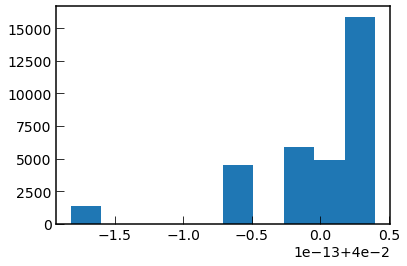

In [22]:
intervals = np.diff(data4[0])
print('first 100 and last 100 elements : ',intervals[:100],intervals[-100:])
print('The interval between recorings is : ', intervals[0]*1000, ' ms')
print('The sampling frequency of the data is : ', 1/intervals[0], ' Hz')

plt.hist(intervals*1000)

Apart from numerical inaccuracies, the interval is constant throughout the recording. 

4. Calculate the mean of the first 500 data-points, and the mean of all data-points betweeen the 23,000th and 25,000th element. <br>**Hint:** You can use numpy slicing to access subsets of the array.

In [18]:
print('the mean of the first 500 data-points is :',np.mean(data4[1,:500])*1000., 'mV')
print('the mean of all points betweeen the 23,000th and 25,000th element is :', np.mean(data4[1,22999:25000])*1000,' mV')

the mean of the first 500 data-points is : -64.51112746755035 mV
the mean of all points betweeen the 23,000th and 25,000th element is : -93.76587758696688  mV


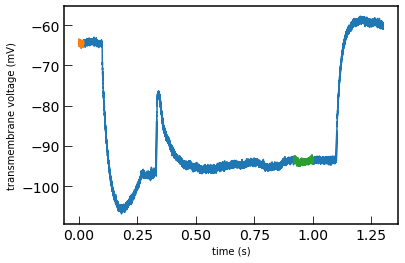

In [19]:
plt.plot(data4[0],data4[1]*1000.)
plt.xlabel('time (s)')
plt.ylabel('transmembrane voltage (mV)')
plt.plot(data4[0,:500],data4[1,:500]*1000.)
plt.plot(data4[0,22999:25000],data4[1,22999:25000]*1000.)

### The information below is not part of the homework assignment

Remember Ohm's law : R = U/I . In this experiment, a hyperpolarizing current has been injected. The input resistance of the neuron can be calcualted from the measured change in membrane potential. The injected current was I = -0.1 nA. In turn, the input resistance is : 

In [3]:
meanBeginning = np.mean(data4[1,:500])
meanEnd = np.mean(data4[1,22999:25000])
current = -0.1E-9
R = (meanEnd-(meanBeginning))/(current) # R = Delta U / I

In [4]:
print('The input resistance of the neuron is : ',R/1E6, 'MOhm')

The input resistance of the neuron is :  292.5475011941653 MOhm
